<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interpreting-Models-using-SHAP" data-toc-modified-id="Interpreting-Models-using-SHAP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interpreting Models using SHAP</a></span><ul class="toc-item"><li><span><a href="#Shapley-Values" data-toc-modified-id="Shapley-Values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Shapley Values</a></span></li><li><span><a href="#The-big-BUT" data-toc-modified-id="The-big-BUT-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The big BUT</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SHAP</a></span><ul class="toc-item"><li><span><a href="#Definition" data-toc-modified-id="Definition-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Definition</a></span></li><li><span><a href="#Different-types-of-SHAP" data-toc-modified-id="Different-types-of-SHAP-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Different types of SHAP</a></span></li><li><span><a href="#Different-types-of-Charts-in-SHAP" data-toc-modified-id="Different-types-of-Charts-in-SHAP-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Different types of Charts in SHAP</a></span></li></ul></li><li><span><a href="#SHAP-in-Action:-A-Classification-Example" data-toc-modified-id="SHAP-in-Action:-A-Classification-Example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>SHAP in Action: A Classification Example</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#The-Problem:-Classifying-Risk-of-Cervical-Cancer" data-toc-modified-id="The-Problem:-Classifying-Risk-of-Cervical-Cancer-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>The Problem: Classifying Risk of Cervical Cancer</a></span></li><li><span><a href="#Force-Plot" data-toc-modified-id="Force-Plot-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Force Plot</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Summary-Plot-(Beeswarm-Plot)" data-toc-modified-id="Summary-Plot-(Beeswarm-Plot)-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Summary Plot (Beeswarm Plot)</a></span></li><li><span><a href="#Dependence-Plot" data-toc-modified-id="Dependence-Plot-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Dependence Plot</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

<a href="https://colab.research.google.com/github/leolorenzoii/ml2_interpretability/blob/main/notebooks/02_Interpreting_Models_using_SHAP.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" align="left" alt="Open In Colab"/>
</a>

In [ ]:
# # Run this cell if using Google Colab, then restart your kernel
# !pip install -r https://raw.githubusercontent.com/leolorenzoii/ml2_interpretability/main/requirements.txt

# Interpreting Models using SHAP

## Shapley Values

Shapley values are a concept of the cooperative game theory field, whose objective is to measure each player’s contribution to the game. The method for obtaining Shapley values was proposed by [Lloyd Shapley](https://www.degruyter.com/document/doi/10.1515/9781400881970-018/html) in 1953. Shapley values emerge from the context where *n* players participate collectively obtaining a reward *p* which is intended to be fairly distributed at each one of the *n* players according to the individual contribution, such a contribution is a **Shapley value**.

In simple words, a Shapley value is the average marginal contribution of an instance of a feature among all possible coalitions. 

## The big BUT

Machine Learning models usually have a **large** number of features where each feature is a discrete or continuous variable, this causes it to be computationally very complicated to calculate Shapley values for each instance of each feature, in fact, it is an **NP-hard problem**. One could imagine retraining the model on all possible combinations of features!

This is the point where SHAP becomes the **hero**! 

In the next section, we will see what SHAP is and its approach to the interpretability of ML models.

## SHAP

<div>
    <img src="images/shap.png" align="left"/>
</div>

### Definition

[SHAP (SHapley Additive exPlanations)](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) is truly a phenomenal work by Lundberg and Lee (2017). The abstract reads as follows:


> *Understanding **why** a model makes a certain prediction can be as **crucial** as the prediction’s accuracy in many applications. However, the highest accuracy for large modern datasets is often achieved by complex models that even experts struggle to interpret, such as ensemble or deep learning models, creating a __tension__ between __accuracy__ and __interpretability__. In response, various methods have recently been proposed to help users interpret the predictions of complex models, but it is often unclear how these methods are related and when one method is preferable over another. To address this problem, we present a unified framework for interpreting predictions, SHAP (SHapley Additive exPlanations). SHAP assigns each feature an importance value for a particular prediction. Its novel components include: (1) the identification of a new class of additive feature importance measures, and (2) theoretical results showing there is a unique solution in this class with a set of desirable properties. The new class unifies six existing methods, notable because several recent methods in the class lack the proposed desirable properties. Based on insights from this unification, we present new methods that show improved computational performance and/or better consistency with human intuition than previous approaches.*

SHAP is a technique developed by **Lundberg and Lee in 2017** for interpreting ML model predictions using Shapely values. The central principle of SHAP is to compute the Shapley values for each characteristic of the sample to be interpreted, where each Shapley value indicates the influence that the related feature has on the prediction.

The concept of SHAP is simple to grasp. That is, there is a Shapley value for *every feature*. But how does SHAP work?

We observed in the last notebook that calculating Shapley values for multiple features might become **intractable**. To prevent this, the authors developed **Kernel Shap**, an expanded and modified technique for calculating Shapley values based on linear [LIME](https://arxiv.org/pdf/1602.04938.pdf). But we won't get into specifics here!



### Different types of SHAP

Kernel Shap is a method that allows the calculation of Shapley values with much fewer coalition samples. Kernel Shap is based on a weighted linear regression where the coefficients of the solution are the Shapley values. To build the weighted linear model, *n* sample coalitions are taken, for each coalition, the prediction is obtained and the weight is calculated with the kernel shap. Finally, the weighted linear model is fit and the resulting coefficients are the Shapley values.

Kernel Shap is the only method model-agnostic for the calculation of Shapley values, that is, **Kernel Shap** can interpret any ML model regardless of its nature. On the other hand, the authors also proposed other variants to obtain Shapley values based on different types of models such as **Tree SHAP**, **Deep SHAP**, and **Linear SHAP**.

SHAP has a list of classes that again uses Shapley values to explain any machine learning model or python function. These classes are commonly referred to as explainers. This explainer generally takes the ML model and data as input and returns an explainer object, which has SHAP values. This  will then be used to plot various charts explained that we will show later on. 

Some of the frequently used explainers are as follows:


1. **KernelExplainer** - This explainer uses the Kernel SHAP method to explain the output of any function. Kernel SHAP is a method that uses a special weighted linear regression to compute the importance of each feature. The computed importance values are Shapley values from game theory and also coefficents from a local linear regression.
2. **LinearExplainer** - This explainer is used for linear models available from sklearn. It can account for the relationship between features as well.
3. **TreeExplainer** - Uses Tree SHAP algorithms to explain the output of ensemble tree models. Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence.
4. **DeepExplainer** - This explainer is designed for deep learning models created using Keras, TensorFlow, and PyTorch. It’s an enhanced version of the DeepLIFT algorithm where we measure conditional expectations of SHAP values based on a number of background samples.

Below is a list of all other available explainers with SHAP.

1. **AdditiveExplainer** - This explainer is used to explain Generalized Additive Models.
2. **BruteForceExplainer** - This explainer uses the brute force approach to find shap values which will try all possible parameter sequence.
3. **GradientExplainer** - This explainer is used for differentiable models which are based on the concept of expected gradients which itself is an extension of the integrated gradients method.
4. **PartitionExplainer** - This explainer calculates shap values recursively through trying a hierarchy of feature combinations. It can capture the relationship between a group of related features.
5. **PermutationExplainer** - This explainer iterates through all permutation of features in both forward and reverses directions. This explainer can take more time if tried with many samples.
6. **SamplingExplainer** - This explainer generates shap values based on assumption that features are independent and is an extension of an algorithm proposed in the paper "An Efficient Explanation of Individual Classifications using Game Theory".
7. **CoefficentExplainer** - This explainer returns model coefficients as shap values. It does not do any actual shap values calculation.
8. **LimeTabularExplainer** - This explainer simply wrap around LimeTabularExplainer from lime library. If you are interested in learning about lime then please feel free to check on our tutorial on the same from references section.
9. **MapleExplainer** - This explainer simply wraps MAPLE into shap interface.
10. **RandomExplainer** - This explainer simply returns random feature shap values.
11. **TreeGainExplainer** - This explainer returns global gain/Gini feature importances for tree models as shap values.
12. **TreeMapleExplainer** - This explainer provides a wrapper around tree MAPLE into shap interface.

<div class="alert alert-info">

**Note**

The drawback of the KernelExplainer is its long running time. If your model is a tree-based machine learning model, you should use the tree explainer `TreeExplainer()` that has been optimized to render fast results. If your model is a deep learning model, use the deep learning explainer `DeepExplainer()`. The SHAP Python module does not yet have specifically optimized algorithms for all types of algorithms.
</div>

### Different types of Charts in SHAP

Below is a list of available charts with SHAP, but today we will only focus on **1-3**.

1. **force_plot** - It plots shap values using additive force layout. It can help us see which features most positively or negatively contributed to prediction.
2. **summary_plot** - It creates a beeswarm plot of shap values distribution of each feature of the dataset.
3. **dependence_plot** - It shows relationship between feature value (X-axis) and its shape values (Y-axis).
4. **decision_plot** - It shows the path of how the model reached a particular decision based on shap values of individual features. The individual plotted line represents one sample of data and how it reached a particular prediction.
5. **multioutput_decision_plot** - Its decision plot for multi output models.
6. **image_plot** - It plots shape values for images.
7. **monitoring_plot** - It helps in monitoring the behavior of the model over time. It monitors the loss of model overtime.
8. **embedding_plot** - It projects shap values using PCA for 2D visualization.
9. **partial_dependence_plot** - It shows basic partial dependence plot for a feature.
10. **bar_plot** - It shows a bar plot of shap values impact on the prediction of a particular sample.
11. **waterfall_plot** - It shows a waterfall plot explaining a particular prediction of the model based on shap values. It kind of shows the path of how shap values were added to the base value to come to a particular prediction.
12. **text_plot** - It plots an explanation of text samples coloring text based on their shap values.

## SHAP in Action: A Classification Example

### Dataset

The **Cervical Cancer Dataset** contains indicators and risk factors for predicting whether a woman will get cervical cancer. The features include demographic data (such as age), lifestyle, and medical history. The data can be downloaded from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29) and is described by Fernandes, Cardoso, and Fernandes (2017).

The subset of data features used in the book’s examples are:

```
Age in years
Number of sexual partners
First sexual intercourse (age in years)
Number of pregnancies
Smoking yes or no
Smoking (in years)
Hormonal contraceptives yes or no
Hormonal contraceptives (in years)
Intrauterine device yes or no (IUD)
Number of years with an intrauterine device (IUD)
Has patient ever had a sexually transmitted disease (STD) yes or no
Number of STD diagnoses
Time since first STD diagnosis
Time since last STD diagnosis
The biopsy results “Healthy” or “Cancer”. Target outcome.
```
The biopsy serves as the gold standard for diagnosing cervical cancer. 

### The Problem: Classifying Risk of Cervical Cancer
We shall be using random forest classifier with 100 trees to predict the risk for cervical cancer. We will use SHAP to explain individual predictions.

In [194]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [195]:
# import dataset
df = pd.read_csv('../data/risk_factors_cervical_cancer.csv')

# # use this line instead if using Google Colab
# df = pd.read_csv('https://raw.githubusercontent.com/leolorenzoii/ml2_interpretability/main/data/risk_factors_cervical_cancer.csv')

# pick features we like
df = df[[
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives',
    'Hormonal Contraceptives (years)',
    'IUD',
    'IUD (years)',
    'STDs',
    'Biopsy'
]]

# replace all question marks to nan
df = df.replace('?', np.nan)

# drop nan values
df = df.dropna()

# reset index, not really needed
df = df.reset_index(drop=True)

# change all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# display what we have so far
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Let's use random forest as our model. 

In [196]:
from sklearn.ensemble import RandomForestRegressor

# get target
y = df.Biopsy

# get features
X = df.drop('Biopsy', axis=1)

# train a model
model = RandomForestRegressor(random_state=10, n_estimators=100, n_jobs=-1)

# fit the model
model = model.fit(X, y)

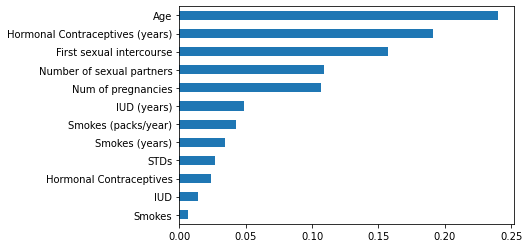

In [197]:
# print the feature importances, standard after a tree-based model 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh');

Since we used random forest, we then will use the TreeExplainer.

In [198]:
import shap

# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

### Force Plot

The force plot shows shap values contributions in generating final prediction using an additive force layout. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. 

***Code Specifics***

We can generate force plot using ``force_plot()`` method. Below are some of the parameters you may use for the ``force_plot()``.

```
Parameters
----------
base_value : float
    This is the reference value that the feature contributions start from. 
    For SHAP values it should be the value of explainer.expected_value.

shap_values : numpy.array
    Matrix of SHAP values (# features) or (# samples x # features). 
    If this is a 1D array then a single force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.

features : numpy.array
    Matrix of feature values (# features) or (# samples x # features). 
    This provides the values of all the features, and should be the same shape as the shap_values argument.

matplotlib : bool
    Whether to use the default Javascript output, or the (less developed) matplotlib output. 
    Using matplotlib can be helpful in scenarios where rendering Javascript/HTML is inconvenient. 
```

The below figure shows SHAP explanation force plots for a woman from the cervical cancer dataset.

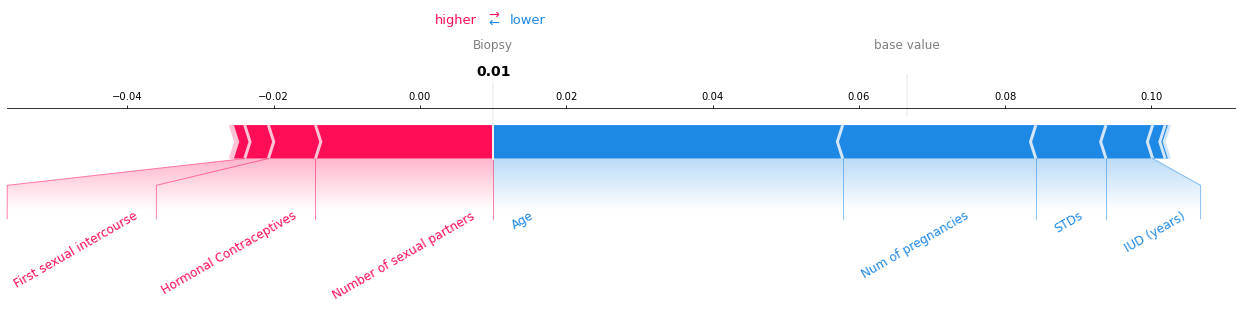

In [199]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(base_value = explainer.expected_value, 
                shap_values = shap_values[0], 
                feature_names = X.columns, 
                out_names = 'Biopsy',
                matplotlib=True, 
                figsize=(22, 4), 
                text_rotation=30)

In the plot, each Shapley value is an arrow that **pushes** to **increase** (positive value) or **decrease** (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

The baseline – the average predicted probability – is 0.01. Risk increasing effects such as number of sexual partners are offset by decreasing effects such as age.

In [200]:
# we can also print the shap values if we like
# pick one sample (woman) from the dataset
shap_vals = shap_values[0]

feature_importance = pd.DataFrame(list(zip(X.columns, shap_vals)),
                                  columns=['column_value', 'shap_vals'])

feature_importance.sort_values(by=['shap_vals'], 
                               ascending=False, 
                               inplace=True)

feature_importance

,column_value,shap_vals
1,Number of sexual partners,0.024292
7,Hormonal Contraceptives,0.006438
2,First sexual intercourse,0.003237
8,Hormonal Contraceptives (years),0.001689
4,Smokes,0.000206
5,Smokes (years),0.000074
9,IUD,-0.000589
6,Smokes (packs/year),-0.001705
10,IUD (years),-0.006381
11,STDs,-0.009591


So what we have so far are explanations for individual predictions.

Shapley values can be combined into global explanations. If we run SHAP for every instance, we get a matrix of Shapley values. This matrix has one row per data instance and one column per feature. We can interpret the entire model by analyzing the Shapley values in this matrix.

### Feature Importance

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want the global importance, we sum the absolute Shapley values per feature across the data.

***Code Specifics***

We can generate summary plot using `summary_plot()` method. Below are list of important parameters of `summary_plot()` method.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```

Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the random forest trained before for predicting cervical cancer.

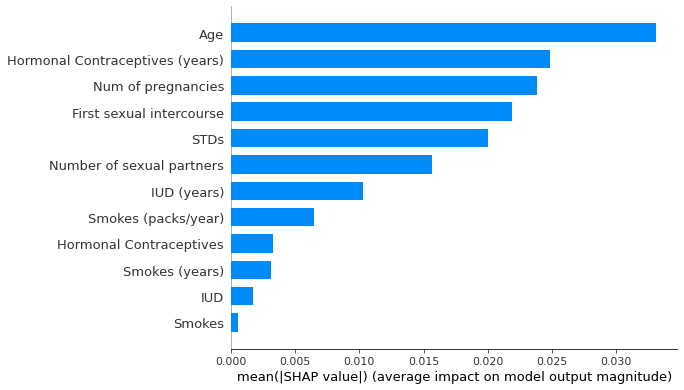

In [201]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values = shap_values, 
                  features = X, 
                  plot_type="bar")

SHAP feature importance measured as the mean absolute Shapley values. Age was the most important feature, changing the predicted absolute cancer probability on average by 3.4 percentage points (0.034 on x-axis).

SHAP feature importance is an alternative to permutation feature importance. There is a big difference between both importance measures: Permutation feature importance is based on the decrease in model performance. SHAP is based on magnitude of feature attributions.

The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

### Summary Plot (Beeswarm Plot)

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

***Code Specifics***

We can generate summary plot using ``summary_plot()`` method. Below are list of important parameters of ``summary_plot()``.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```

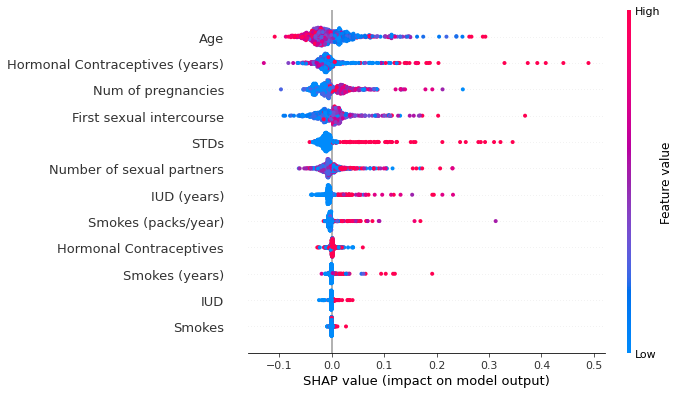

In [206]:
# summarize the effects of all the features
shap.summary_plot(shap_values = shap_values, 
                  features = X)

For our example, it seems that high age reduces the predicted cancer risk, a low age increases the risk. Low number of years on hormonal contraceptives reduce the predicted cancer risk, a large number of years increases the risk.

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

<div class='alert alert-info'>
Reminder:
    
    
All effects describe the behavior of the model and are not necessarily causal in the real world.
</div>

### Dependence Plot

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. 

- Each dot is a single prediction (row) from the dataset. Therefore one woman.
- The x-axis is the value of the feature from the X matrix.
- The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model, it's the risk of cervical cancer.
- The color corresponds to a **second feature** that may have an interaction effect with the feature we are plotting. *By default this second feature is chosen automatically*. If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

SHAP dependence plots are an alternative to partial dependence plots (PDP) and accumulated local effects (ALE). While PDP and ALE plot show average effects, SHAP dependence also shows the variance on the y-axis. Especially in case of interactions, the SHAP dependence plot will be much more dispersed in the y-axis.

**Code Specifics**

We can generate summary plot using ``dependence_plot()`` method. Below are list of important parameters of ``dependence_plot()``.

```
Parameters
----------
ind : int or string
    If this is an int it is the index of the feature to plot. If this is a string it is
    either the name of the feature to plot, or it can have the form "rank(int)" to specify
    the feature with that rank (ordered by mean absolute SHAP value over all the samples).

shap_values : numpy.array
    Matrix of SHAP values (# samples x # features).

features : numpy.array or pandas.DataFrame
    Matrix of feature values (# samples x # features).

interaction_index : "auto", None, int, or string
    The index of the feature used to color the plot. The name of a feature can also be passed
    as a string. If "auto" then shap.common.approximate_interactions is used to pick what
    seems to be the strongest interaction (note that to find to true stongest interaction you
    need to compute the SHAP interaction values).
    
```

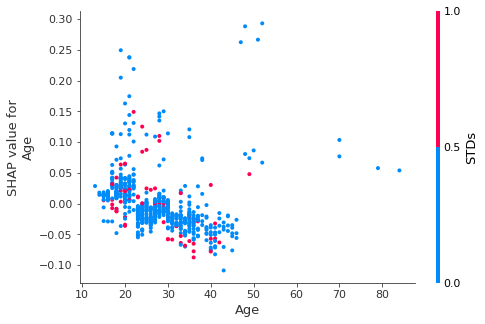

In [205]:
shap.dependence_plot(ind = 'Age', 
                     shap_values = shap_values, 
                     features = X)

## Exercise

<div class="alert alert-success">
 To be revealed in class. 😎
<div>

## References
1. https://shap.readthedocs.io/en/latest/index.html
2. https://christophm.github.io/interpretable-ml-book/
3. https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach
4. https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html